In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import scipy.signal as ss
import seaborn as sns
import numpy as np
from skimage.io import imread
from glob import glob
import os
import h5py
import matplotlib.colors
import seaborn as sns
import matplotlib.patches as mpatches

### Load data as dataframe

#### Read .pkl files for both single and combo mutants

In [2]:
sumPath = '/Users/zhengj10/Desktop/GENIE/Meeting/iGluSnFR4 paper_Abhi_230410'
df_winner = pd.read_excel(sumPath+'/__Finalized__ iGluSnFR4 list of potential winners Jan 19th 2022.xlsx')
df_winner['ID (633dot)'].unique().shape
df_all = pd.read_excel(sumPath+'/iGluSnFR4 data organized Jan 18 2023.xlsx')
df_all.shape

(4441, 9)

In [3]:
# df_all = df_all.dropna()

In [4]:
# df_all.columns
# df_winner.columns
# for c in df_winner['ID (633dot)'].unique():
#     print(c in df_all['ID'].unique())

In [5]:
Fast_dF = []
T_off = []
C = []
Color = []
dFF_1AP = []
dFF_20AP = []
for c in df_all['ID'].unique():
    df_t = df_all[df_all['ID']==c]
    C.append(c)
    Fast_dF.append(df_t['1AP ∆Ffast normalized'].median())
    T_off.append(df_t['T<sub>off</sub>'].median())
#     if c in df_winner['ID (633dot)'].unique():
    if c in [8880,9147]:
        Color.append('r')
        print(c)
    else:
        Color.append('gray')
    dFF_1AP.append(df_t['1AP ∆F/F0 normalized'].median())
    dFF_20AP.append(df_t['20AP ∆F/F0'].median())
df_median = pd.DataFrame()
df_median['ID'] = C
df_median['Fast dF'] = Fast_dF
df_median['Tau off'] = T_off
df_median['Color'] = Color
df_median['dFF 1AP'] = dFF_1AP
df_median['dFF 20AP'] = dFF_20AP

9147
8880


In [6]:
# df_median

In [7]:
df_single = df_median[df_median['ID']<7887]
df_single = df_single.sort_values(by='Fast dF',ascending=True)
df_combo = df_median[df_median['ID']>=7887]
df_combo = df_combo.sort_values(by='Fast dF',ascending=True)
# df_combo

In [8]:
df_sort = pd.concat([df_single,df_combo],axis=0)
# df_sort = df_sort.dropna()

#### Screening progress (barplot)

/var/folders/87/trl8ql4s7vj6fkdtrrkcwx6s0zb2d2/T/ipykernel_13509/612242334.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0)


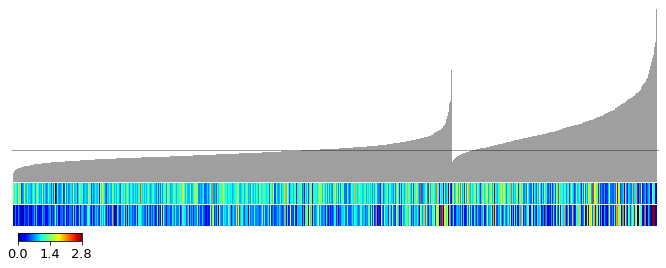

In [9]:
import matplotlib as mpl
plt.rc('font',size=13)
x = np.arange(df_sort.shape[0])
s = x.shape[0]
seg = 10

f,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,gridspec_kw={'height_ratios':[4,0.5,0.5,0.75]},figsize=(9,3.5))

bar = ax1.bar(x,df_sort['Fast dF'],width=1,color=df_sort['Color'],alpha=0.75)
ax1.hlines(1,-seg,s+seg,color='k',alpha=0.5,lw=0.75)
ax1.axis('off')
ax1.set_xlabel('construct_no',size=14,color='w')

ax1.set_xlim([-seg,s+seg])
ax1.set_ylim([0,5.5])

my_cmap = plt.get_cmap("jet")
rescale = lambda y:y/(5.654111015686038*0.5)

ax2.bar(x,1,width=1,color=my_cmap(rescale(df_sort['dFF 1AP'])))
ax2.axis('off')
ax2.set_xlim([-seg,s+seg])

ax3.bar(x,1,width=1,color=my_cmap(rescale(df_sort['dFF 20AP'])))
ax3.axis('off')
ax3.set_xlim([-seg,s+seg])

ax4.axis('off')
N = len(df_sort)
cmap = plt.get_cmap('jet', N)
norm = mpl.colors.Normalize(vmin=0, vmax=5.654111015686038*0.5)

# creating ScalarMappable
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
axins = inset_axes(ax4,width="10%",height="25%",loc='upper left')

cbar = plt.colorbar(sm,cax=axins, ticks=np.linspace(0,2.8,3),orientation='horizontal')
# cbar.ax.set_ylabel('Norm. dFF',size=14,rotation=0)

plt.tight_layout(pad=0)
# plt.savefig('/Users/zhengj10/Desktop/230207/screening_progress.pdf',format='pdf')
# plt.savefig('/Users/zhengj10/Desktop/screening_progress.svg',format='svg')
plt.show()

#### Kerr plot

In [10]:
# df_combo

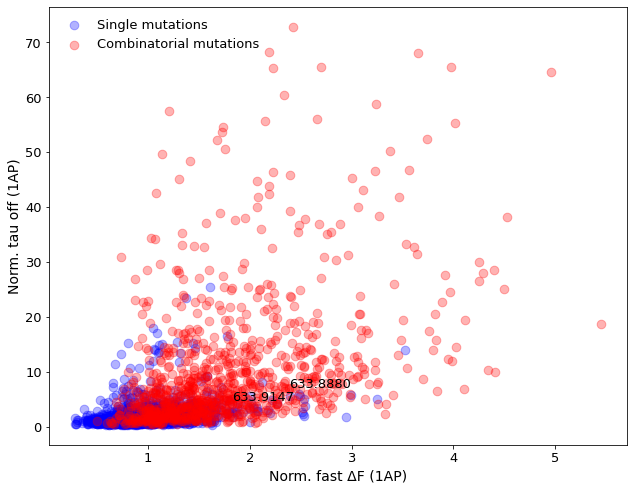

In [11]:
plt.rc('font',size=13)
plt.figure(figsize=[9,7])
ax = plt.subplot(111)
ax.scatter(df_single['Fast dF'],df_single['Tau off'],color='b',alpha=0.3,label='Single mutations',s=75)
ax.scatter(df_combo['Fast dF'],df_combo['Tau off'],color='r',alpha=0.3,label='Combinatorial mutations',s=75)
ax.set_xlabel('Norm. fast \u0394F (1AP)',size=14)
ax.set_ylabel('Norm. tau off (1AP)',size=14)
leg = plt.legend(loc='upper left',frameon=False)

text_height = (ax.get_ylim()[1]-ax.get_ylim()[0])/40
construct_l = df_combo['ID'].to_list()
fastdF_l = df_combo['Fast dF'].to_list()
tauoff_l = df_combo['Tau off'].to_list()
for i,construct in enumerate(construct_l):
    if construct in [8880,9147]:
        ax.text(fastdF_l[i],tauoff_l[i]+text_height,'633.%s' %construct,ha="center",size=13)
plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/Kerr.svg',format='svg')
plt.show()

#### dFF traces of top hits

In [12]:
sumPath = '/Users/zhengj10/Desktop/iGluSnFR'

df_single_20AP = pd.read_pickle(sumPath+'/iGluSnFR_screen_single_20AP.pkl')
df_combo_20AP = pd.read_pickle(sumPath+'/iGluSnFR_screen_combo_20AP.pkl')

df_single_1AP = pd.read_pickle(sumPath+'/iGluSnFR_screen_single_1AP.pkl')
df_single_1AP = df_single_1AP[df_single_1AP['no_pixels']>1e4]
df_single_1AP = df_single_1AP[(df_single_1AP['fast_dF'].notna())&(df_single_1AP['dFF'].notna())]

df_combo_1AP = pd.read_pickle(sumPath+'/iGluSnFR_screen_combo_1AP.pkl')
df_combo_1AP = df_combo_1AP[df_combo_1AP['no_pixels']>1e4]
df_combo_1AP = df_combo_1AP[(df_combo_1AP['fast_dF'].notna())&(df_combo_1AP['dFF'].notna())]

In [13]:
df_all = pd.concat([df_single_1AP,df_combo_1AP],axis=0)
df_all.shape

(4502, 27)

In [14]:
top_hits = ['633dot8880','633dot9147']

In [15]:
dataPath = '/Volumes/genie/BenArthur/GETI-screen/kaspars-method-v2'

In [16]:
Date = glob(dataPath+'/2023*')
Date.sort()
Date

['/Volumes/genie/BenArthur/GETI-screen/kaspars-method-v2/20230123_iGluSnFR',
 '/Volumes/genie/BenArthur/GETI-screen/kaspars-method-v2/20230130_iGluSnFR',
 '/Volumes/genie/BenArthur/GETI-screen/kaspars-method-v2/20230206_iGluSnFR',
 '/Volumes/genie/BenArthur/GETI-screen/kaspars-method-v2/20230213_iGluSnFR',
 '/Volumes/genie/BenArthur/GETI-screen/kaspars-method-v2/20230220_iGluSnFR',
 '/Volumes/genie/BenArthur/GETI-screen/kaspars-method-v2/20230227_iGluSnFR',
 '/Volumes/genie/BenArthur/GETI-screen/kaspars-method-v2/20230306_iGluSnFR',
 '/Volumes/genie/BenArthur/GETI-screen/kaspars-method-v2/20230313_iGluSnFR']

In [17]:
def isNaN(A):
    return A!=A

gotya!
gotya!
gotya!
gotya!
gotya!
gotya!
gotya!
gotya!
(-10.513034105300903, 163.64548325538635)


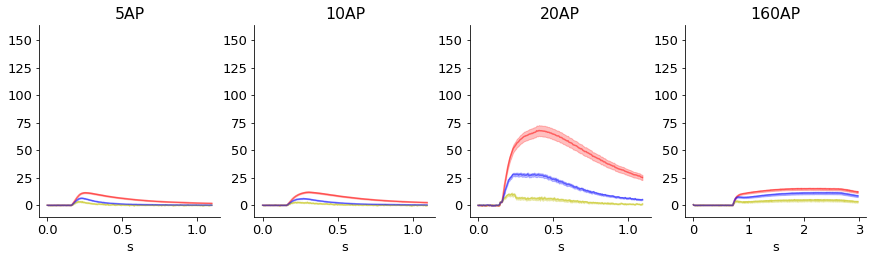

In [21]:
plt.rc('font', size=13)

# plt.figure(figsize=[3.5,3.5])
# stim = ['1AP']

plt.figure(figsize=[12,3.5])
stim = ['5AP','10AP','20AP','160AP']

ctr = '556dot857'
C_dict = {'556dot857':'b','633dot8880':'r','633dot9147':'y'}

sp = 1
for s in stim:
    dFF_ctr = []
    ax = plt.subplot(1,len(stim),sp)
    for c in top_hits:
#         print(c)
        matFiles = []
        dFF_mutant = []
        for date in Date:
            Plate = glob(date+'/P0*')
            for plate in Plate:
                
                if os.path.basename(plate) in ['P06a-20230227_iGluSnFR-e3-none','P06a-20230227_iGluSnFR-e3-none-allbutskip']:
                    print('gotya!')
                    continue

                matFiles = glob(os.path.join(plate,c)+'/*%s.mat' %s)
                if len(matFiles)==0:
                    continue
                
                matFiles_mutant = [m for m in matFiles if c in m and s in m]
                
#                 print(len(matFiles_mutant))

                matFiles_ctr = glob(os.path.join(plate,'556dot857')+'/*%s.mat' %s)
                if len(matFiles_ctr)==0:
                    print('f',plate)
                    continue

                for f in matFiles_ctr:
                    matData = h5py.File(f,'r')
#                     dFF_trace = matData['responsive_traces']['fit']['ave_trace'][()]-matData['responsive_traces']['bkg_level'][()][0]
                    dFF_trace = matData['responsive_traces']['fit']['bleach_bkg_norm_ave_trace'][()]
                    if dFF_trace.shape[0]!=540:
                        continue
                    dFF_ctr.append(dFF_trace)
                if len(dFF_ctr)==0:
                    print('ctr',plate)
                    continue

                for f in matFiles_mutant:
                    matData = h5py.File(f,'r')
#                     dFF_trace = matData['responsive_traces']['fit']['ave_trace'][()]-matData['responsive_traces']['bkg_level'][()][0]
                    dFF_trace = matData['responsive_traces']['fit']['bleach_bkg_norm_ave_trace'][()]

                    if isNaN(dFF_trace[0]):
#                         print('f_nan',f)
                        continue
                    if dFF_trace.shape[0]!=540:
                        continue
                    dFF_mutant.append(dFF_trace)
                if len(dFF_mutant)==0:
#                     print('f',plate)
                    continue
                    
#                 if c=='633dot9147' and s=='5AP':
#                     print(os.path.basename(date),os.path.basename(plate))

        mean = np.nanmean(dFF_mutant,axis=0)
        err = np.nanstd(dFF_mutant,axis=0)/np.sqrt(len(dFF_mutant))
#         print(c,len(dFF_mutant))
        
        if s!='160AP':
            mean = mean[100:300]
            err = err[100:300]
        x = np.arange(mean.shape[0])/181.4815
            
        ax.plot(x,mean,color=C_dict[c],alpha=0.5,label=c.replace('dot','.'))
        ax.fill_between(x,mean+err,mean-err,color=C_dict[c],alpha=0.25)
            
    mean = np.nanmean(dFF_ctr,axis=0)
    err = np.nanstd(dFF_ctr,axis=0)/np.sqrt(len(dFF_ctr))
    
    if s!='160AP':
        mean = mean[100:300]
        err = err[100:300]
    x = np.arange(mean.shape[0])/181.4815


    ax.plot(x,mean,color='b',alpha=0.5,label='556.857')
    ax.fill_between(x,mean+err,mean-err,color='b',alpha=0.25)
#     ax.grid(axis='y')
    
#     if sp==1:
    if s=='1AP':
        handles, labels = plt.gca().get_legend_handles_labels()
        order = [2,0,1]
        plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],frameon=False,loc='upper left',bbox_to_anchor=[0.5,1]) 

        ax.set_ylabel('Brightness (A.U.)',size=13)

#     ax.set_ylim([-9.565730333328247,143.75210404396057])
    ax.set_title(s)
    ax.set_xlabel('s',size=13)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if not s=='1AP':
        ax.set_ylim([-10.513034105300903, 163.64548325538635])
    sp+=1
    if s=='160AP':
        print(ax.get_ylim())
#     if s!='5AP':
#         ax.get_yaxis().set_visible(False)
#         ax.spines['left'].set_visible(False)

plt.tight_layout(pad=0.2)
# plt.savefig('/Volumes/genie/Jihong_GENIE_stuff/Manuscript/iGluSnFR4_paper/v3/F_traces_other_stim.svg',format='svg')
# plt.savefig('/Volumes/genie/Jihong_GENIE_stuff/Manuscript/iGluSnFR4_paper/v3/F_traces_1AP.svg',format='svg')
plt.show()

In [19]:
# matFiles_mutant
matFiles_ctr
# date
# plate
# os.path.join(plate,c)

[]

#### kinetics, peak dFF and SNR

In [62]:
# ax.get_ylim()
# top_hits
Date

['/Volumes/genie/BenArthur/GETI-screen/kaspars-method-v2/20230123_iGluSnFR',
 '/Volumes/genie/BenArthur/GETI-screen/kaspars-method-v2/20230130_iGluSnFR',
 '/Volumes/genie/BenArthur/GETI-screen/kaspars-method-v2/20230206_iGluSnFR',
 '/Volumes/genie/BenArthur/GETI-screen/kaspars-method-v2/20230213_iGluSnFR',
 '/Volumes/genie/BenArthur/GETI-screen/kaspars-method-v2/20230220_iGluSnFR',
 '/Volumes/genie/BenArthur/GETI-screen/kaspars-method-v2/20230227_iGluSnFR',
 '/Volumes/genie/BenArthur/GETI-screen/kaspars-method-v2/20230306_iGluSnFR',
 '/Volumes/genie/BenArthur/GETI-screen/kaspars-method-v2/20230313_iGluSnFR']

633dot8880
/Volumes/genie/BenArthur/GETI-screen/kaspars-method-v2/20230213_iGluSnFR/P06a-20230130_iGluSnFR
/Volumes/genie/BenArthur/GETI-screen/kaspars-method-v2/20230227_iGluSnFR/P06a-20230213_iGluSnFR
/Volumes/genie/BenArthur/GETI-screen/kaspars-method-v2/20230306_iGluSnFR/P06a-20230220_iGluSnFR
/Volumes/genie/BenArthur/GETI-screen/kaspars-method-v2/20230313_iGluSnFR/P06a-20230227_iGluSnFR
633dot9147
/Volumes/genie/BenArthur/GETI-screen/kaspars-method-v2/20230213_iGluSnFR/P06a-20230130_iGluSnFR
/Volumes/genie/BenArthur/GETI-screen/kaspars-method-v2/20230227_iGluSnFR/P06a-20230213_iGluSnFR
/Volumes/genie/BenArthur/GETI-screen/kaspars-method-v2/20230306_iGluSnFR/P06a-20230220_iGluSnFR
/Volumes/genie/BenArthur/GETI-screen/kaspars-method-v2/20230313_iGluSnFR/P06a-20230227_iGluSnFR


ValueError: Axis limits cannot be NaN or Inf

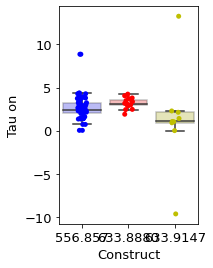

In [74]:
plt.figure(figsize=[2.5,4])
plt.rc('font', size=13)
C_dict = {'556.857':'b','633.8880':'r','633.9147':'y'}
C = []
Tau_on = []
D = []
P = []
W = []
for c in top_hits:
    print(c)
    for date in Date:
        Plate = glob(date+'/P0*')
        for plate in Plate:
            

            matFiles = glob(os.path.join(plate,c)+'/*1AP.mat')
            if len(matFiles)==0:
                continue
            print(plate)
            matFiles_mutant = [m for m in matFiles if c in m and '1AP' in m]
            matFiles_ctr = glob(os.path.join(plate,'556dot857')+'/*1AP.mat')

            for f in matFiles_ctr:
                matData = h5py.File(f,'r')
                tau_on = matData['responsive_traces']['fit']['bkg_norm_ave_ontau'][()][0]
                D.append(date)
                P.append(plate)
                W.append(os.path.basename(f).split('-')[0])
                C.append('556.857')
                Tau_on.append(tau_on)

            for f in matFiles_mutant:
                matData = h5py.File(f,'r')
                tau_on = matData['responsive_traces']['fit']['bkg_norm_ave_ontau'][()][0]
                D.append(os.path.basename(date))
                P.append(os.path.basename(plate))
                W.append(os.path.basename(f).split('-')[0])
                C.append(c.replace('dot','.'))
                Tau_on.append(tau_on)
            
df_k = pd.DataFrame()
df_k['Date'] = D
df_k['Plate'] = P
df_k['Well'] = W
df_k['Construct'] = C
df_k['Tau on'] = Tau_on
# df_k = df_k.dropna()
ax = plt.subplot(111)
sns.boxplot(x='Construct',y='Tau on',data=df_k,ax=ax,boxprops=dict(alpha=0.3),palette=C_dict,showfliers = False)
sns.stripplot(x='Construct',y='Tau on',data=df_k,ax=ax,palette=C_dict)
a = np.quantile(df_k['Tau on'],0.01)
b = np.quantile(df_k['Tau on'],0.99)
ax.set_ylim([a,b])
ax.set_xlabel('')
ax.set_ylabel('Tau on (ms)')
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig('/Volumes/genie/Jihong_GENIE_stuff/Manuscript/iGluSnFR4_paper/v3/kinetics.svg',format='svg')
plt.show()

In [96]:
# plate
# matFiles_mutant
# matData['responsive_traces']['pix_index']
# matData['responsive_traces']['fit']
# matData['responsive_traces'].keys()

In [80]:
df_k[df_k['Construct']=='633.9147']

,Date,Plate,Well,Construct,Tau on
56,20230213_iGluSnFR,P06a-20230130_iGluSnFR,C05,633.9147,NaN
57,20230213_iGluSnFR,P06a-20230130_iGluSnFR,A05,633.9147,NaN
58,20230213_iGluSnFR,P06a-20230130_iGluSnFR,B05,633.9147,NaN
59,20230213_iGluSnFR,P06a-20230130_iGluSnFR,D05,633.9147,NaN
68,20230227_iGluSnFR,P06a-20230213_iGluSnFR,C05,633.9147,0.000154
69,20230227_iGluSnFR,P06a-20230213_iGluSnFR,A05,633.9147,NaN
70,20230227_iGluSnFR,P06a-20230213_iGluSnFR,B05,633.9147,2.283428
71,20230227_iGluSnFR,P06a-20230213_iGluSnFR,D05,633.9147,2.126802
80,20230306_iGluSnFR,P06a-20230220_iGluSnFR,C05,633.9147,NaN
81,20230306_iGluSnFR,P06a-20230220_iGluSnFR,A05,633.9147,-9.671271


#### Peak dFF

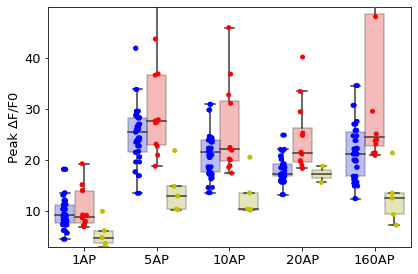

In [55]:
plt.figure(figsize=[6,4])
plt.rc('font', size=13)
C_dict = {'556.857':'b','633.8880':'r','633.9147':'y'}
S = []
C = []
Peak_dFF = []
stim = ['1AP','5AP','10AP','20AP','160AP']
for s in stim:
    for c in top_hits:
        for date in Date:
            Plate = glob(date+'/P0*')
            for plate in Plate:

                matFiles = glob(os.path.join(plate,c)+'/*%s.mat' %s)
                if len(matFiles)==0:
                    continue
                
                matFiles_mutant = [m for m in matFiles if c in m and s in m]
                matFiles_ctr = glob(os.path.join(plate,'556dot857')+'/*%s.mat' %s)

                for f in matFiles_ctr:
                    matData = h5py.File(f,'r')

    #                 dFF_trace = matData['responsive_traces']['fit']['bleach_bkg_norm_ave_trace'][()]
    #                 if isNaN(dFF_trace[0]):
    #                     continue
    #                 peak_dFF = np.max(dFF_trace)-np.max(dFF_trace[10:15])

    #                 peak_dFF = matData['responsive_traces']['fit']['bkg_norm_ave_dFoF0'][()][0]

                    peak_dFF = matData['responsive_traces']['fit']['bkg_ave_respmean'][()][0]

                    S.append(s)
                    C.append('556.857')
                    Peak_dFF.append(peak_dFF)

                for f in matFiles_mutant:
                    matData = h5py.File(f,'r')

    #                 dFF_trace = matData['responsive_traces']['fit']['bleach_bkg_norm_ave_trace'][()]
    #                 peak_dFF = np.max(dFF_trace)-np.max(dFF_trace[10:15])

    #                 peak_dFF = matData['responsive_traces']['fit']['bkg_norm_ave_dFoF0'][()][0]

                    peak_dFF = matData['responsive_traces']['fit']['bkg_ave_respmean'][()][0]

                    S.append(s)
                    C.append(c.replace('dot','.'))
                    Peak_dFF.append(peak_dFF)
                
df_dffp = pd.DataFrame()
df_dffp['Stim'] = S
df_dffp['Construct'] = C
df_dffp['Peak dFF'] = Peak_dFF
df_dffp = df_dffp.dropna()
ax = plt.subplot(111)
sns.boxplot(x='Stim',y='Peak dFF',data=df_dffp,ax=ax,boxprops=dict(alpha=0.3),palette=C_dict,hue='Construct',
           showfliers = False)
sns.stripplot(x='Stim',y='Peak dFF',data=df_dffp,ax=ax,palette=C_dict,hue='Construct',dodge=True)
a = np.quantile(df_dffp['Peak dFF'],0)
b = np.quantile(df_dffp['Peak dFF'],0.99)
ax.set_ylim([a,b])
ax.set_xlabel('')
ax.set_ylabel('Peak \u0394F/F0')


import matplotlib.patches as mpatches

patchList = []
for key in C_dict:
        data_key = mpatches.Patch(color=C_dict[key], label=key)
        patchList.append(data_key)

# plt.legend(handles=patchList)
plt.legend([],[], frameon=False)
plt.tight_layout()
# plt.savefig('/Volumes/genie/Jihong_GENIE_stuff/Manuscript/iGluSnFR4_paper/v3/peak_dFF.svg',format='svg')
plt.show()

#### SNR

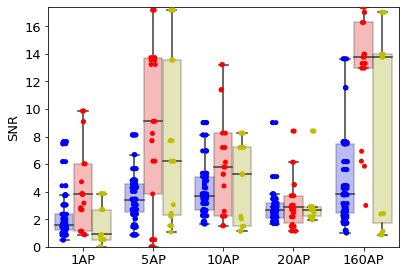

In [57]:
plt.figure(figsize=[6,4])
plt.rc('font', size=13)
C_dict = {'556.857':'b','633.8880':'r','633.9147':'y'}
S = []
C = []
SNR = []
stim = ['1AP','5AP','10AP','20AP','160AP']
for s in stim:
    for c in top_hits:
        for date in Date:
            Plate = glob(date+'/P0*')
            for plate in Plate:

                matFiles = glob(os.path.join(plate,c)+'/*%s.mat' %s)
                if len(matFiles)==0:
                    continue
                
                matFiles_mutant = [m for m in matFiles if c in m and s in m]
                matFiles_ctr = glob(os.path.join(plate,'556dot857')+'/*%s.mat' %s)

            for f in matFiles_ctr:
                matData = h5py.File(f,'r')
                snr = matData['responsive_traces']['fit']['bkg_norm_ave_snr'][()][0]
                S.append(s)
                C.append('556.857')
                SNR.append(snr)

            for f in matFiles_mutant:
                matData = h5py.File(f,'r')
                snr = matData['responsive_traces']['fit']['bkg_norm_ave_snr'][()][0]
                S.append(s)
                C.append(c.replace('dot','.'))
                SNR.append(snr)
                
df_snr = pd.DataFrame()
df_snr['Stim'] = S
df_snr['Construct'] = C
df_snr['SNR'] = SNR
df_snr = df_snr.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
ax = plt.subplot(111)
sns.boxplot(x='Stim',y='SNR',data=df_snr,ax=ax,boxprops=dict(alpha=0.3),palette=C_dict, hue='Construct',
           showfliers = False)
sns.stripplot(x='Stim',y='SNR',data=df_snr,ax=ax,palette=C_dict,hue='Construct',dodge=True)
a = np.quantile(df_snr['SNR'],0)
b = np.quantile(df_snr['SNR'],0.99)
ax.set_ylim([a,b])
ax.set_xlabel('')

# patchList = []
# for key in C_dict:
#         data_key = mpatches.Patch(color=C_dict[key], label=key)
#         patchList.append(data_key)
# plt.legend(handles=patchList)

plt.legend([],[], frameon=False)
plt.tight_layout()
plt.savefig('/Volumes/genie/Jihong_GENIE_stuff/Manuscript/iGluSnFR4_paper/v3/SNR.svg',format='svg')
plt.show()